메타 데이터:

1)Age - 사용자의 연령대?

2)Gender - 사용자의 성별?

3)spotify_use_period - Spotify를 사용한 지 얼마나 되셨나요?

4)spotify_listening_device - 다음 중 어떤 기기를 주로 사용하여 Spotify를 듣나요?

5)spotify_subscription_plan - 현재 어떤 Spotify 정액제를 사용 중이신가요?

6)premium_sub_willingness - 프리미엄 정액제를 이용할 의향이 있으신가요, 아니면 향후에도 프리미엄 정액제를 계속 이용할 의향이 있으신가요?

7)preffered_premium_plan - 프리미엄 요금제를 사용 중이거나 프리미엄 요금제를 사용할 의향이 있는 경우, 구독료로 얼마를 지불하시나요?

8)preferred_listening_content - 무엇을 더 듣고 싶으신가요?

9)fav_music_genre - 어떤 장르의 음악을 가장 즐겨듣나요?

10)music_time_slot - 음악을 듣기 위해 가장 좋아하는 시간대는 언제인가요?

11)music_Influencial_mood - 음악을 들을 때 다음 중 어떤 분위기나 상황이 음악 선택에 가장 큰 영향을 미치나요?

12)music_lis_frequency - 언제 음악을 더 자주 듣나요?

13)music_expl_method - Spotify에서 새로운 음악을 어떻게 발견하나요?

14)music_recc_rating - Spotify 추천 음악에 대해 어떻게 평가하시나요?

15)pod_lis_frequency - 팟캐스트를 얼마나 자주 듣나요?

16)fav_pod_genre - 어떤 장르의 팟캐스트를 가장 즐겨 듣나요?

17)preffered_pod_format - 일반적으로 어떤 팟캐스트 형식을 선호하시나요?

18)pod_host_preference - 잘 알려지지 않은 인물의 팟캐스트를 듣는 것을 더 선호하시나요, 아니면 잘 알려진 인물이 진행하는 팟캐스트를 선호하시나요?

19)preffered_pod_duration - 짧은 팟캐스트 에피소드(30분 미만)를 선호하시나요, 아니면 긴 에피소드(30분 이상)를 선호하시나요?

20)pod_variety_satisfaction - Spotify에서 제공하는 팟캐스트의 다양성과 가용성에 만족하십니까?

# 문제 정의

1. 사람들을 새롭게 추천된 음악을 듣게하려면 어떻게 해야하는가?
2. 스포티파이 프리미엄 요금제로 업그레이드하거나, 이용하게 하려면 어떤 전략을 취해야하는가?
3. 팟캐스트로 유입 비율을 늘리려면 어떻게 해야하는가?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

music = pd.read_excel('/content/drive/MyDrive/Spotify_data.xlsx')

In [ ]:
music['Age'].value_counts()

20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: Age, dtype: int64

In [ ]:
music['Age'].name

'Age'

In [ ]:
#컬럼에 있는 값의 특성을 확인하기 위함
for i in music.columns:
  print('Column name: ', music[i].name)
  print('Unique: ',  music[i].unique())
  print('==================================================================')


Column name:  Age
Unique:  ['20-35' '12-20' '35-60' '6-12' '60+']
Column name:  Gender
Unique:  ['Female' 'Male' 'Others']
Column name:  spotify_usage_period
Unique:  ['More than 2 years' '6 months to 1 year' '1 year to 2 years'
 'Less than 6 months']
Column name:  spotify_listening_device
Unique:  ['Smart speakers or voice assistants' 'Computer or laptop'
 'Smartphone, Smart speakers or voice assistants' 'Smartphone'
 'Smartphone, Computer or laptop'
 'Smartphone, Computer or laptop, Smart speakers or voice assistants'
 'Smartphone, Wearable devices'
 'Smartphone, Computer or laptop, Wearable devices'
 'Computer or laptop, Wearable devices'
 'Smartphone, Computer or laptop, Smart speakers or voice assistants, Wearable devices'
 'Wearable devices'
 'Smartphone, Smart speakers or voice assistants, Wearable devices'
 'Computer or laptop, Smart speakers or voice assistants'
 'Computer or laptop, Smart speakers or voice assistants, Wearable devices'
 'Smart speakers or voice assistants, We

In [ ]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       520 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

# 데이터 전처리

In [ ]:
#데이터 타입 확인
print(music.dtypes)

Age                            object
Gender                         object
spotify_usage_period           object
spotify_listening_device       object
spotify_subscription_plan      object
premium_sub_willingness        object
preffered_premium_plan         object
preferred_listening_content    object
fav_music_genre                object
music_time_slot                object
music_Influencial_mood         object
music_lis_frequency            object
music_expl_method              object
music_recc_rating               int64
pod_lis_frequency              object
fav_pod_genre                  object
preffered_pod_format           object
pod_host_preference            object
preffered_pod_duration         object
pod_variety_satisfaction       object
dtype: object


In [ ]:
#데이터의 결측치를 확인 (-> 없음)

music.isna().sum()

Age                            0
Gender                         0
spotify_usage_period           0
spotify_listening_device       0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
music_lis_frequency            0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64

# EDA

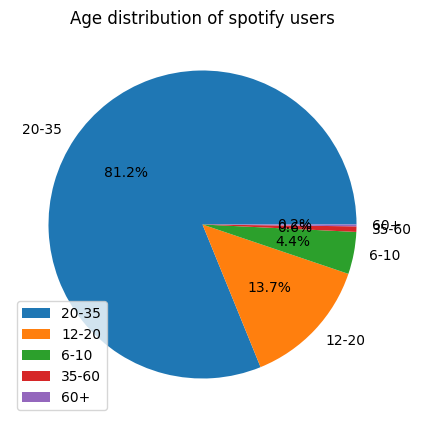

In [ ]:
#나이대별 유저들의 분포 (labels를 리스트로 미리 지정한다음에 labels=labels로 지정해주면 색도 고정되고 좋은 듯!)

y=music['Age'].value_counts()
plt.figure(figsize=(5,5))
labels=['20-35', '12-20', '6-10', '35-60', '60+']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Age distribution of spotify users')
plt.show()

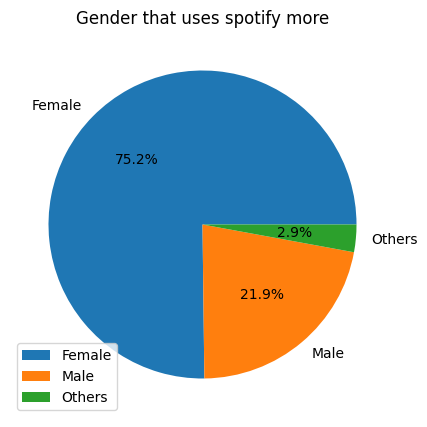

In [ ]:
#성별 별로 유저들의 분포

y=music['Gender'].value_counts()
plt.figure(figsize=(5,5))
labels=['Female','Male','Others']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Gender that uses spotify more')
plt.show()

<Axes: xlabel='spotify_subscription_plan', ylabel='count'>

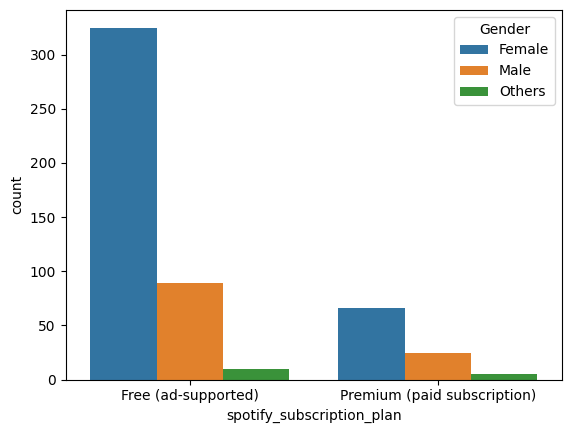

In [ ]:
#스포티파이 구독 플랜 확인하기(hue는 보통 성별이나 나이대 별로 구분해야할 때 사용하기)

sns.countplot(x='spotify_subscription_plan', data=music, hue='Gender')

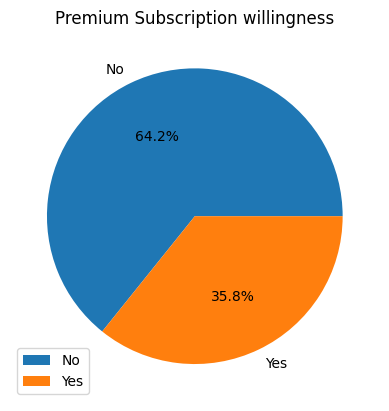

In [ ]:
#스포티파이 프리미엄 정액제 단순 이용 여부
y = music['premium_sub_willingness'].value_counts()
labels=['No','Yes']
plt.pie(y, labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Premium Subscription willingness')
plt.show()

<Axes: xlabel='premium_sub_willingness', ylabel='count'>

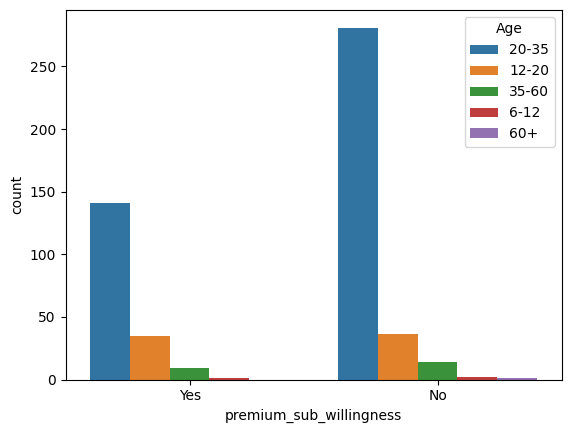

In [ ]:
#스포티파이 프리미엄 정액제 연령대별 이용여부
sns.countplot(x='premium_sub_willingness', data=music, hue='Age')

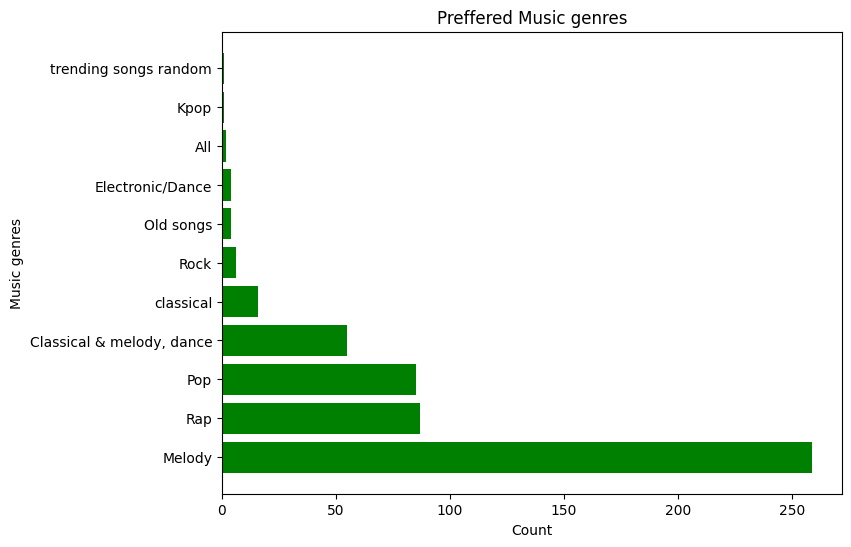

In [ ]:
#좋아하는 장르

fig, ax = plt.subplots(figsize=(8,6))
y=music['fav_music_genre'].value_counts().values #.values를 사용하면 리스트형태로 value 데이터를 저장
x=music['fav_music_genre'].unique() #장르의 이름을 리스트형태로 저장
plt.barh(x,y,color='g') #리스트 형태의 정보들을 가져와서 가로막대그래프로 생성, 컬러는 녹색으로 생성
plt.xlabel('Count')
plt.ylabel('Music genres')
plt.title('Preffered Music genres')
plt.show()

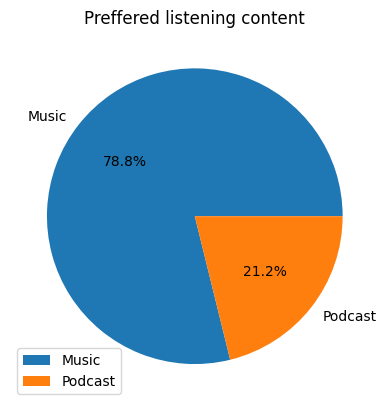

In [ ]:
#선호하는 콘텐츠 선호도

y=music['preferred_listening_content'].value_counts()
labels=['Music','Podcast']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Preffered listening content')
plt.show()

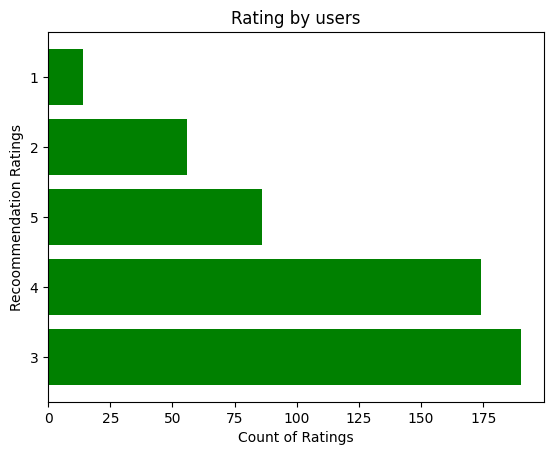

In [ ]:
#스포티파이 추천 음악 평가정도

y = music['music_recc_rating'].value_counts().values
x = ['3','4','5','2','1']
plt.barh(x,y,color='g')
plt.xlabel('Count of Ratings')
plt.ylabel('Recoommendation Ratings')
plt.title('Rating by users')
plt.show()

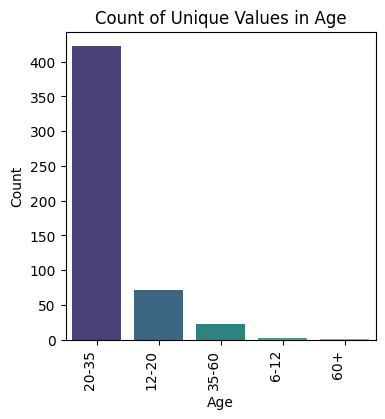

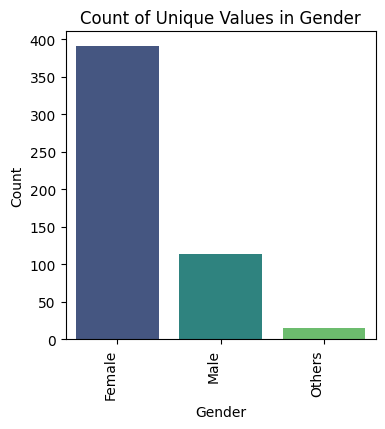

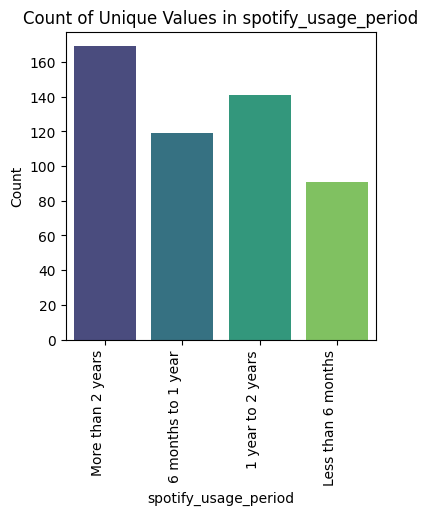

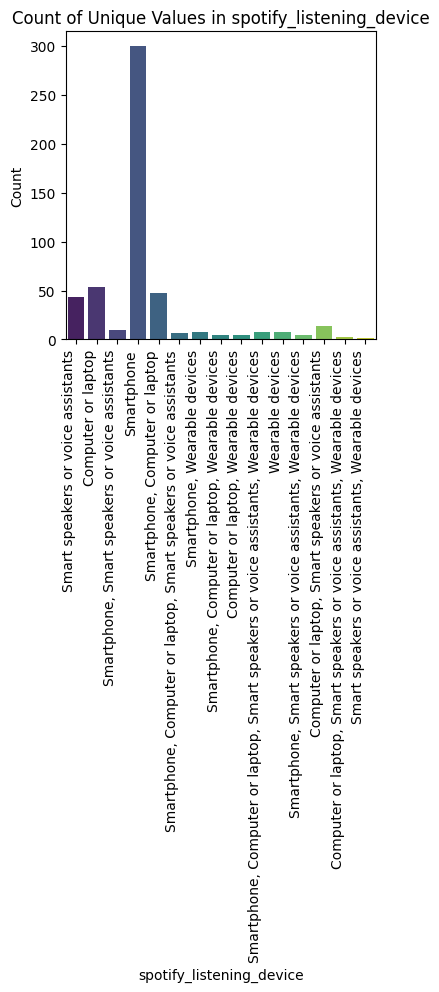

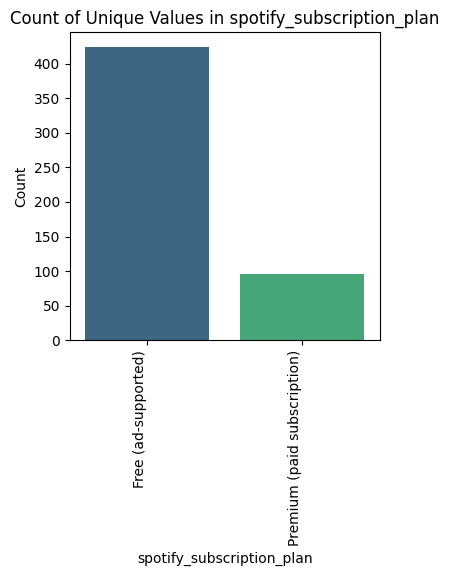

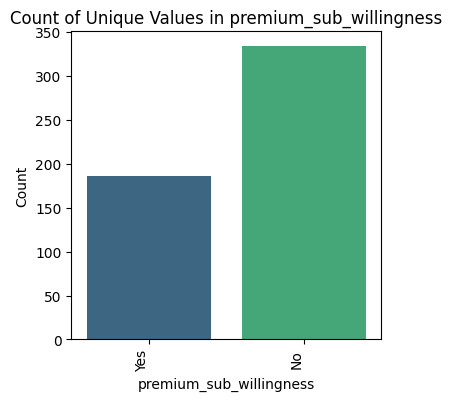

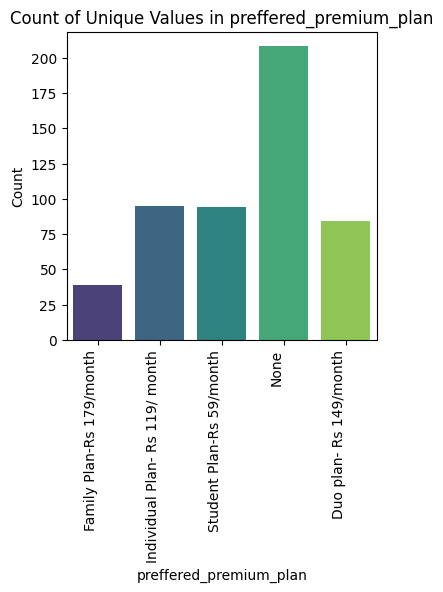

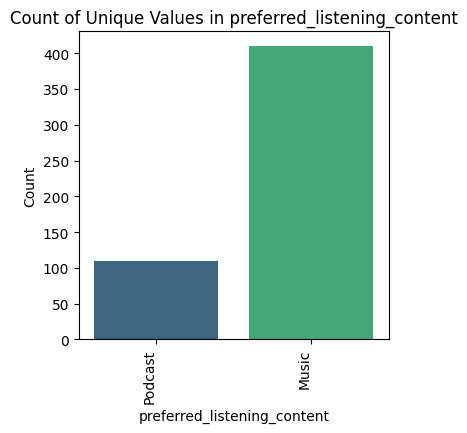

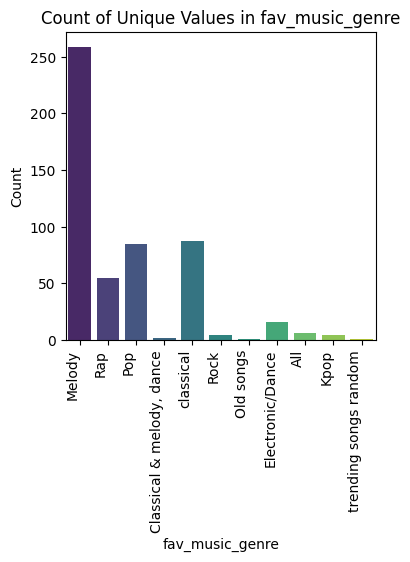

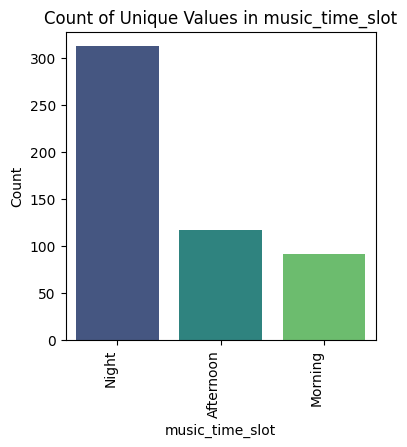

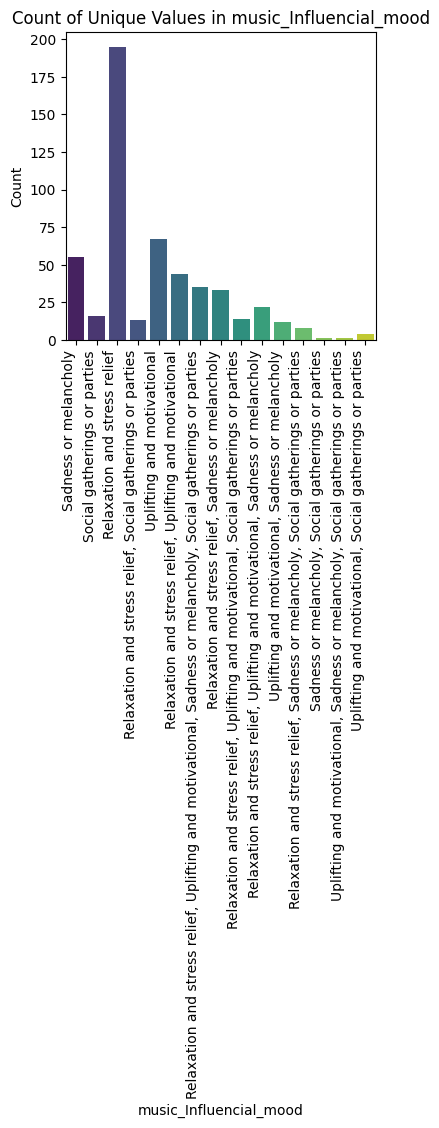

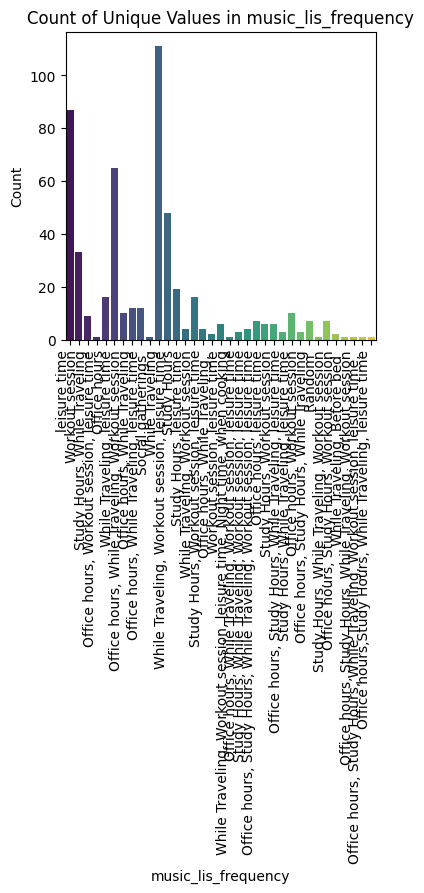

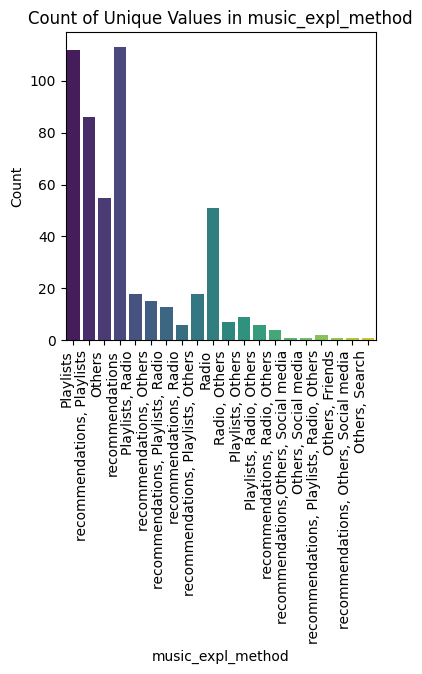

<ipython-input-36-45e5e82ff9a2>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


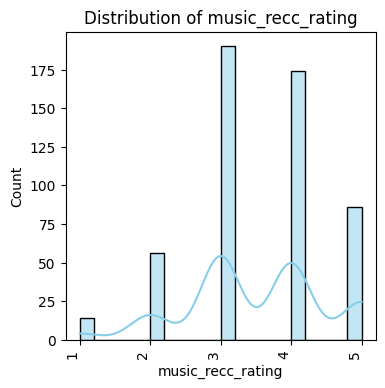

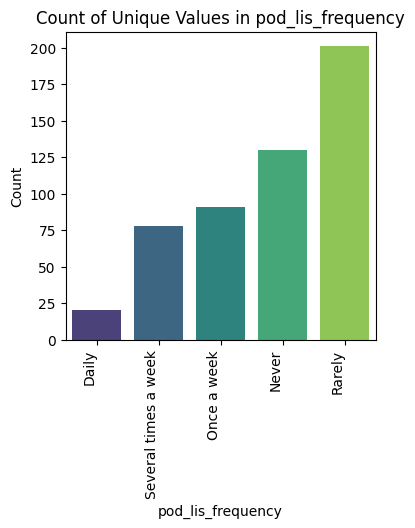

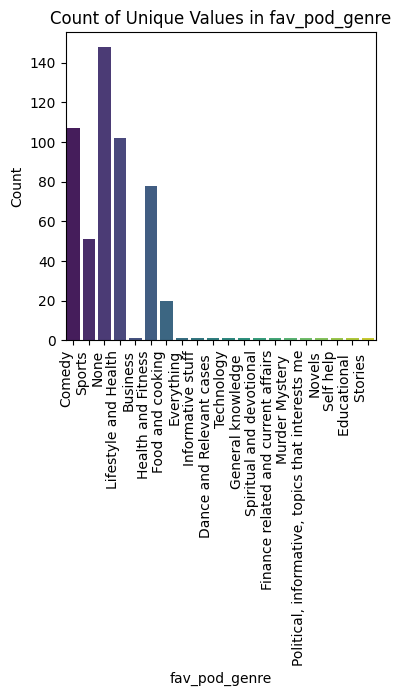

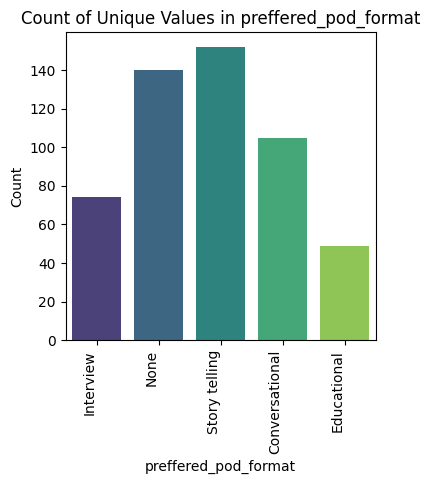

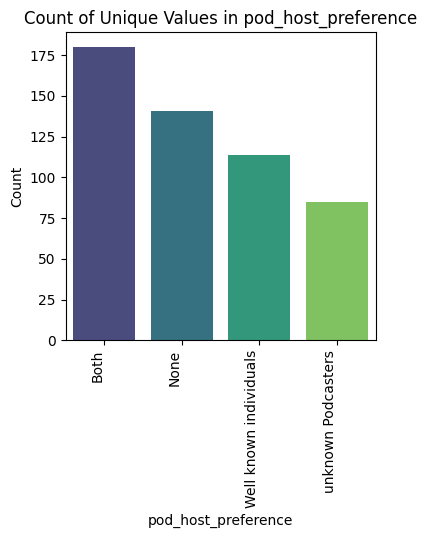

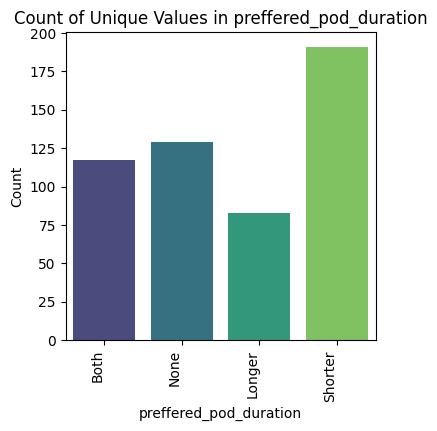

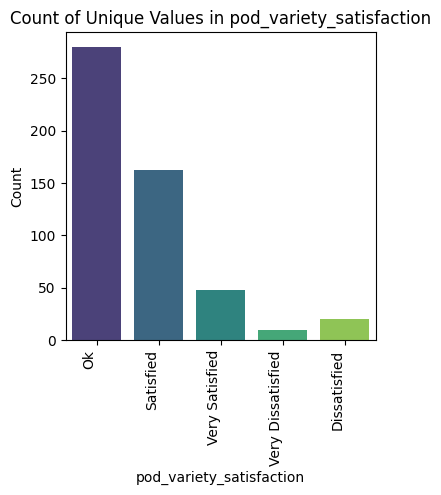

In [ ]:
#데이터 기초 EDA



visualize = music.columns

for column in visualize:
  plt.figure(figsize=(4,4))

  if music[column].dtype == 'object':
    ax = sns.countplot(data=music, x=column, palette='viridis')
    plt.title(f'Count of Unique Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
  else:
    ax = sns.histplot(data=music, x=column, bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

  plt.show()

In [ ]:
grouped_music = music.groupby(['spotify_subscription_plan', 'fav_music_genre']).size().reset_index(name='count')
ordered_df = grouped_music.sort_values(by='count', ascending=False)

sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
barplot = sns.barplot(x='spotify_subscription_plan', y='count', hue='fav_music_genre', data=music)
barplot.set_title('Counts of Spotify Subscription plans by favorite music genre(내림차순)')
barplot.set_xlabel('Spotify Subscription Plan')
barplot.set_ylabel('Count')

plt.show()

ValueError: ignored

<Figure size 1200x600 with 0 Axes>

In [ ]:
music.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,2,1,More than 2 years,Smart speakers or voice assistants,0,0,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,1,0,More than 2 years,Computer or laptop,0,0,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
2,3,Others,6 months to 1 year,Smart speakers or voice assistants,0,0,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
3,2,1,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",0,1,None,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok
4,2,1,1 year to 2 years,Smartphone,0,1,None,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
